- 5x5 이미지에 Laplacian-like 필터

<pre>
    [0,  1,  0
     1, -4,  1
     0,  1 , 0 ]
  </pre>

- 필터의 결과를 확인

- CNN이 이런 식으로 작동함을 이해

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
# 1. 예제 흑백 이미지 (1채널, 5x5)
# image = torch.tensor([
#     [0, 0, 0, 0, 0],
#     [0, 10, 10, 10, 0],
#     [0, 10, 50, 10, 0],
#     [0, 10, 10, 10, 0],
#     [0, 0, 0, 0, 0],
# ], dtype=torch.float32)

image = torch.tensor([
    [0, 0, 10, 10, 10],
    [0, 0, 10, 10, 10],
    [0, 0, 10, 10, 10],
    [0, 0, 10, 10, 10],
    [0, 0, 10, 10, 10],
], dtype=torch.float32)

In [ ]:
image.shape

torch.Size([5, 5])

In [ ]:
# 2. 이미지 형태 변경: (batch=1, channel=1, height=5, width=5)
image = image.unsqueeze(0).unsqueeze(0)
image.shape

torch.Size([1, 1, 5, 5])

In [ ]:
# 3. 필터 정의: Laplacian-like edge detector
# kernel = torch.tensor([
#     [0, 1, 0],
#     [1, -4, 1],
#     [0, 1, 0]
# ], dtype=torch.float32)

In [ ]:
# # 4. 필터 형태 변경: (out_channels=1, in_channels=1, kernel_size=3x3)
# kernel = kernel.unsqueeze(0).unsqueeze(0)
# kernel.shape

torch.Size([1, 1, 3, 3])

In [ ]:
# 3. 수직 엣지 필터 (Vertical edge detector)
vertical_kernel = torch.tensor([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], dtype=torch.float32)

In [ ]:
# 4. 필터 형태: (out_channels=1, in_channels=1, kernel_size=3x3)
vertical_kernel = vertical_kernel.unsqueeze(0).unsqueeze(0)

In [ ]:
# 5. 합성곱 연산 (padding=1로 이미지 크기 유지)
output = F.conv2d(image, vertical_kernel, padding=1)
output, output.shape

(tensor([[[[  0.,  20.,  20.,   0., -20.],
           [  0.,  30.,  30.,   0., -30.],
           [  0.,  30.,  30.,   0., -30.],
           [  0.,  30.,  30.,   0., -30.],
           [  0.,  20.,  20.,   0., -20.]]]]),
 torch.Size([1, 1, 5, 5]))

In [ ]:
# 6. 결과 출력
print("입력 이미지:\n", image.squeeze().numpy())
print("\n필터 적용 결과:\n", output.squeeze().detach().numpy())

입력 이미지:
 [[ 0.  0. 10. 10. 10.]
 [ 0.  0. 10. 10. 10.]
 [ 0.  0. 10. 10. 10.]
 [ 0.  0. 10. 10. 10.]
 [ 0.  0. 10. 10. 10.]]

필터 적용 결과:
 [[  0.  20.  20.   0. -20.]
 [  0.  30.  30.   0. -30.]
 [  0.  30.  30.   0. -30.]
 [  0.  30.  30.   0. -30.]
 [  0.  20.  20.   0. -20.]]


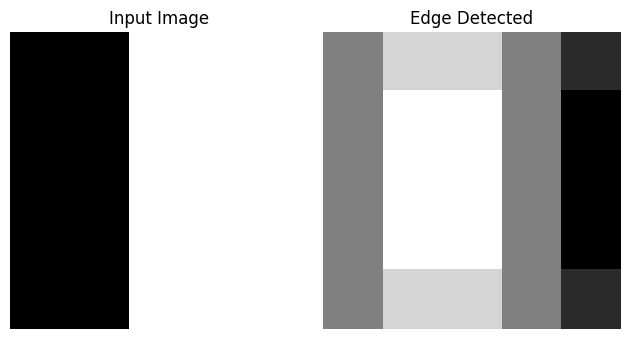

In [ ]:
# 7. 시각화
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(image.squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Edge Detected")
plt.imshow(output.squeeze().detach(), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()